In [1]:
from plastic import materials, HARDENING
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os.path as osp
import os
plt.rcParams.update({"text.usetex": True, "font.family": "Computer Modern"})

def generate_random_signal(T,N,p=1.5,u_max=0.2): 
    k = np.linspace(0, T, T)  
    a = np.random.randn(N)
    u = np.zeros_like(k)
    for n in range(1, N + 1):
        u += (a[n - 1] / n**p) * np.sin(2*np.pi*n*k/N)
    u = np.array(u)
    u = u/(np.max(u) - np.min(u))*u_max
    return u

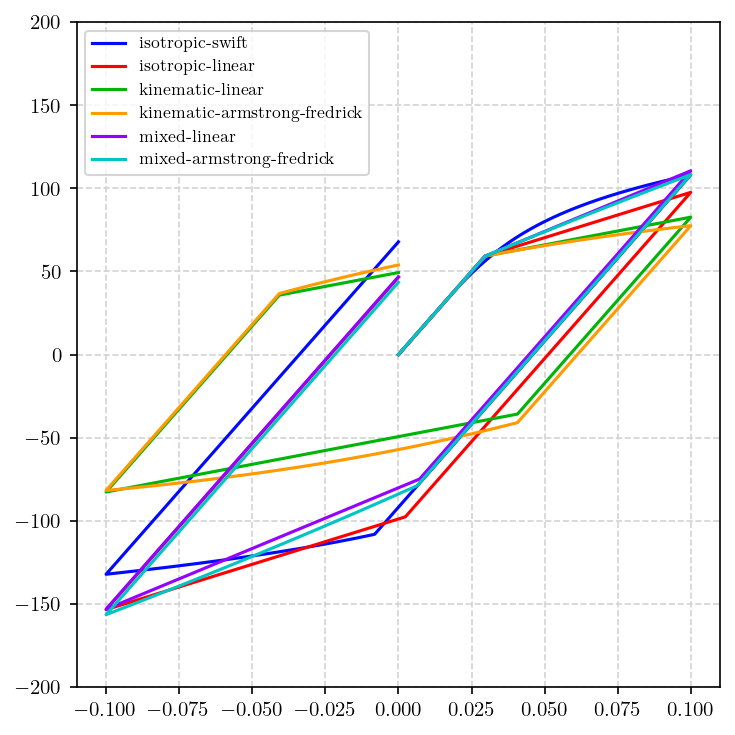

In [2]:
plt.figure(figsize=(5,5),dpi=150)

u_max = 0.1
u_min = -u_max

eps = np.concatenate([np.linspace(0,u_max,1000),np.linspace(u_max,u_min,1000),np.linspace(u_min,0,1000)])
for name in materials.keys():
    mat = materials[name]
    sig, alpha, Y = HARDENING(eps,mat['E'],mat['dalpha'],mat['Y'])
    plt.plot(eps,sig/1e6,label=name,color=materials[name]['color'])
plt.ylim(-200,200)
plt.legend(loc='upper left',fontsize=8)
plt.grid(ls='--',c='lightgray')
plt.tight_layout()
plt.show()

In [3]:
name = 'isotropic-swift'

data_sets = osp.join('data-sets')
u_list = np.load(osp.join(data_sets, name, 'u_list.npy'))
u_benchmark = np.load(osp.join(data_sets, name, 'u_benchmark.npy'))

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:01<00:00, 112.08it/s]


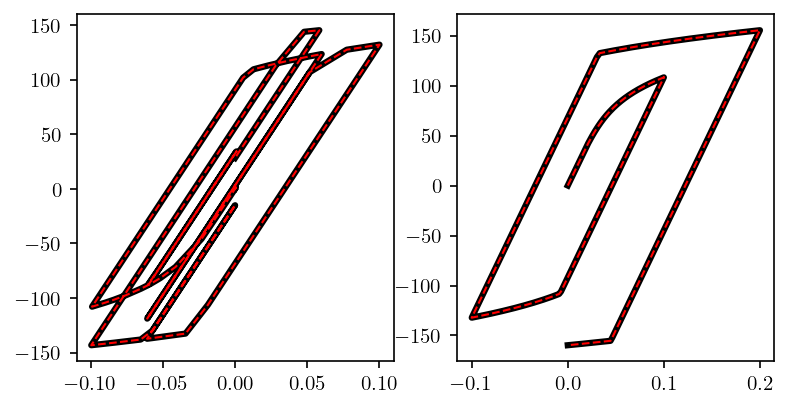

In [4]:
i = 4

y_list_OLD = np.load(osp.join(data_sets, name, 'y_list.npy'))
y_benchmark_OLD = np.load(osp.join(data_sets, name, 'y_benchmark.npy'))

name = 'isotropic-swift'
mat = materials[name]
y_list_NEW = np.array([HARDENING(eps,mat['E'],mat['dalpha'],mat['Y'])[0] for eps in tqdm(u_list)])
y_benchmark_NEW = HARDENING(u_benchmark,mat['E'],mat['dalpha'],mat['Y'])[0]

fig, ax = plt.subplots(1,2,figsize=(6,3),dpi=150)


ax[0].plot(u_list[i],y_list_OLD[i]/1e6,label='Old',color='black',lw=3)
ax[0].plot(u_list[i],y_list_NEW[i]/1e6,label='New',color='red',lw=1,ls='--')

ax[1].plot(u_benchmark,y_benchmark_OLD/1e6,label='Old',color='black',lw=3)
ax[1].plot(u_benchmark,y_benchmark_NEW/1e6,label='New',color='red',lw=1,ls='--')

plt.show()

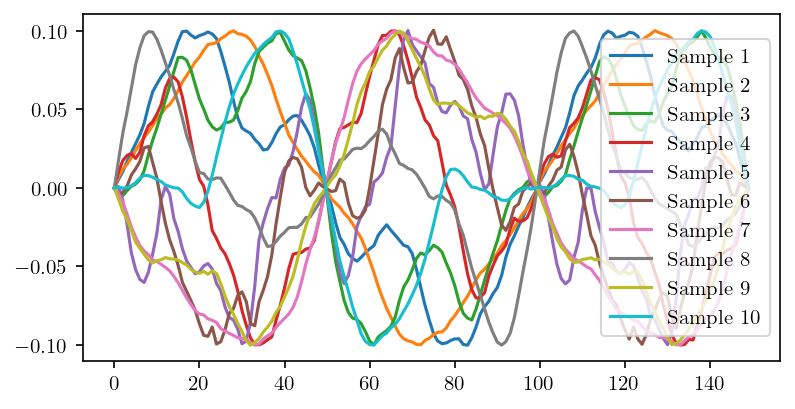

In [5]:
plt.figure(figsize=(6,3),dpi=150)
for i in range(10):
    plt.plot(u_list[i],label=f'Sample {i+1}',lw=1.5)
plt.legend()
plt.show()

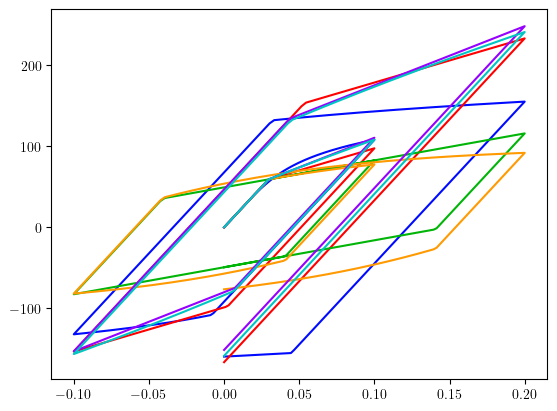

In [6]:
for name in materials.keys():
    mat = materials[name]

    y_benchmark = HARDENING(u_benchmark,mat['E'],mat['dalpha'],mat['Y'])[0]
    plt.plot(u_benchmark,y_benchmark/1e6,label=name,color=materials[name]['color'])

plt.show()

In [7]:
for name in materials.keys():
    mat = materials[name]
    
    data_path = osp.join('data-sets', name)

    if not osp.exists(data_path): os.makedirs(data_path)
    
    # save the input
    np.save(osp.join(data_path ,'u_list.npy'), u_list)
    np.save(osp.join(data_path ,'u_benchmark.npy'), u_benchmark)

    # calculate the stress response for each sample
    y_list = np.array([HARDENING(eps,mat['E'],mat['dalpha'],mat['Y'])[0] for eps in tqdm(u_list,desc=name)])
    y_benchmark = HARDENING(u_benchmark,mat['E'],mat['dalpha'],mat['Y'])[0]
    
    # save the output
    np.save(osp.join(data_path, 'y_list.npy'), y_list)
    np.save(osp.join(data_path, 'y_benchmark.npy'), y_benchmark)

mixed-armstrong-fredrick: 100%|██████████| 200/200 [00:02<00:00, 83.70it/s] 
